# Análise descritiva da série temporal

## Preparando o ambiente

Importando as bibliotecas que iremos usar nas análises.

In [1]:
# imports

import sys
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf

## Importando os dados

In [2]:
# Verificando o caminho/nome para todos os arquivos
# Obs: os nomes dos arquivos foram alterados para facilitar a leitura

arquivos = sorted(glob.glob('dataset/acidentes*'))
arquivos

['dataset/acidentes_2015.csv',
 'dataset/acidentes_2016.csv',
 'dataset/acidentes_2017.csv',
 'dataset/acidentes_2018.csv',
 'dataset/acidentes_2019.csv']

In [3]:
# Fazendo a leitura de cada arquivo como um dataframe

df_2015 = pd.read_csv("dataset/acidentes_2015.csv")
df_2016 = pd.read_csv("dataset/acidentes_2016.csv")
df_2017 = pd.read_csv("dataset/acidentes_2017.csv")
df_2018 = pd.read_csv("dataset/acidentes_2018.csv")
df_2019 = pd.read_csv("dataset/acidentes_2019.csv")

## Primeiro contato com os dados

Foi verificada a quantidade de instâncias e o número de variáveis de cada um dos datasets.

Ao verificar que as variáveis não eram as mesmas para todos os datasets, optou-se por manter apenas as variáveis comuns aos 5 datasets. Em seguida juntamos os datasets no dataframe: df_acidentes_2015_2019.

Verificamos um valor duplicado de uma das instâncias, o qual foi removido do dataset.

Todas essas alterações, podem ser vistas a seguir.

In [4]:
# Verificando as 5 primeiras linhas do dataset ano 2015

df_2015.head(5)

,natureza_acidente,situacao,data,hora,bairro,endereco,numero,complemento,natureza,descricao,...,pedestre,onibus,caminhao,viatura,outros,vitimas,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,SEM VÍTIMA,CANCELADA,2015-12-03,11:36:00.000,CASA AMARELA,AV NORTE,NaN,SENTIDO SUBURBIO E/F AO SESC,COLISÃO,COLISÃO SEM VITIMAS,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,SEM VÍTIMA,FINALIZADA,2015-06-01,06:35:00.000,ENCRUZILHADA,EST DE BELEM,NaN,IGREJA BATISTA MEMORIAL DE BELÉM,COLISÃO,SEM VÍTIMAS.,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,SEM VÍTIMA,FINALIZADA,2015-06-01,08:04:00.000,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,NaN,SEMAFORO Nº217,COLISÃO,SEM VITIMA,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,SEM VÍTIMA,FINALIZADA,2015-06-01,08:06:00.000,AFOGADOS,AV SUL,NaN,AO LADO DA ESTAÇAO LARGO DA PAZ,COLISÃO,COLISAO S/V,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,SEM VÍTIMA,CANCELADA,2015-06-01,08:13:00.000,MADALENA,RUA BENFICA,NaN,EM FRENTE AO CLUBE INTERNACIONAL,COLISÃO,GM RIBEIRO JA NO LOCAL VT 05,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
# Verificando a quantidade de dados e número de variáveis

print("Shape df_2015:", df_2015.shape)
print("Shape df_2016:", df_2016.shape)
print("Shape df_2017:", df_2017.shape)
print("Shape df_2018:", df_2018.shape)
print("Shape df_2019:", df_2019.shape)

Shape df_2015: (7273, 24)
Shape df_2016: (11263, 47)
Shape df_2017: (11758, 32)
Shape df_2018: (11411, 45)
Shape df_2019: (12062, 47)


In [6]:
# Verificando colunas em comum para todos os datasets

lista = list(df_2015.columns)
lista.extend(list(df_2016.columns))
lista.extend(list(df_2017.columns))
lista.extend(list(df_2018.columns))
lista.extend(list(df_2019.columns))
lista = sorted(set(lista))


col_comuns = []
for i in lista:
    if i in (df_2015.columns) and i in (df_2016.columns) and i in (df_2017.columns) and i in (df_2018.columns) and i in (df_2019.columns):
        col_comuns.append(i)
        
print("Colunas comuns aos 5 datasets:\n", col_comuns)

Colunas comuns aos 5 datasets:
 ['auto', 'bairro', 'caminhao', 'ciclista', 'ciclom', 'complemento', 'data', 'endereco', 'hora', 'moto', 'natureza_acidente', 'numero', 'onibus', 'outros', 'pedestre', 'situacao', 'viatura', 'vitimas']


In [7]:
# Juntando os datasets em um único dataframe apenas com as colunas em comum

df_acidentes_2015_2019 = pd.concat([df_2015[col_comuns],
                                    df_2016[col_comuns],
                                    df_2017[col_comuns],
                                    df_2018[col_comuns],
                                    df_2019[col_comuns]],
                                    ignore_index=True,
                                    sort=False)

In [8]:
# Verificando dados duplicados

df_acidentes_2015_2019[df_acidentes_2015_2019.duplicated(keep=False)]

,auto,bairro,caminhao,ciclista,ciclom,complemento,data,endereco,hora,moto,natureza_acidente,numero,onibus,outros,pedestre,situacao,viatura,vitimas
22077,2,BOA VIAGEM,NaN,NaN,NaN,PROX DO COLEGIO SANTA MARIA,2017-04-26,RUA MINISTRO NELSON HUNGRIA,16:29:00,NaN,SEM VÍTIMA,486,NaN,NaN,NaN,FINALIZADA,NaN,0.0
22080,2,BOA VIAGEM,NaN,NaN,NaN,PROX DO COLEGIO SANTA MARIA,2017-04-26,RUA MINISTRO NELSON HUNGRIA,16:29:00,NaN,SEM VÍTIMA,486,NaN,NaN,NaN,FINALIZADA,NaN,0.0


In [9]:
# Excluindo o dado duplicado

df_acidentes_2015_2019.drop_duplicates(keep="first", inplace=True)

In [10]:
# Verificando a quantidade de dados e número de variáveis

print("Shape df_acidentes_2015_2019:", df_acidentes_2015_2019.shape)

Shape df_acidentes_2015_2019: (53766, 18)


In [11]:
# Salvando o dataset para uso posterior

df_acidentes_2015_2019.to_csv('data/df_acidentes_2015_2019.csv')

## Analisando a série temporal

Primeiramente construimos a série temporal de número de acidentes diários.

Foi feita a decomposição da série temporal em: Tendência, Sazonalidade e Resíduo.

A estacionariedade da série foi verificada com os métodos ADF e KPSS.

Também foi analisado a autocorrelação nos dados e feito o plot ACF para verificação de lags.

Todas essas verificações, podem ser vistas a seguir.

In [12]:
# Criando a série temporal com o número de acidentes

df_acidentes = pd.DataFrame(pd.to_datetime(df_acidentes_2015_2019['data']))
df_acidentes['ocorrencias'] = 1

In [13]:
# Agrupando por dia

df_acidentes = df_acidentes.groupby(pd.Grouper(key='data',freq='D')).sum()

In [14]:
# Verificando a série temporal

df_acidentes

,ocorrencias
data,
2015-06-01,39
2015-06-02,49
2015-06-03,46
2015-06-04,28
2015-06-05,40
...,...
2019-12-27,37
2019-12-28,27
2019-12-29,15


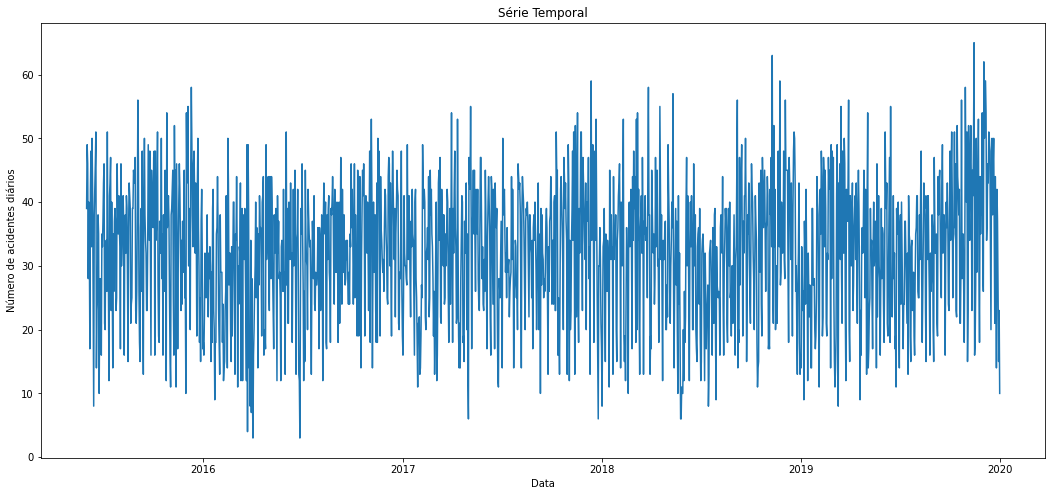

In [15]:
# Plotando a série temporal

plt.figure(figsize=(18, 8))
g = sns.lineplot(x=df_acidentes.index,y=df_acidentes['ocorrencias'])
g.set_title('Série Temporal')
g.set_xlabel('Data')
g.set_ylabel('Número de acidentes diários');

In [16]:
# função para plot da decomposição

def plot_decomposicao(decomposicao):
     
    fig, ax = plt.subplots(figsize=(20, 16), nrows=4)
    
    # série original
    ax[0].plot(decomposition.observed)
    ax[0].set_title("Série")
    
    # componente tendência
    ax[1].plot(decomposition.trend)
    ax[1].set_title("Tendência")
    
    # componente sazonal
    ax[2].plot(decomposition.seasonal)
    ax[2].set_title("Sazonalidade")
    
    # resíduo
    ax[3].plot(decomposition.resid)
    ax[3].set_title("Resíduo")
    
    # configuração do plot
    plt.rcParams.update({'font.size': 14})
    plt.tight_layout()
    plt.show()

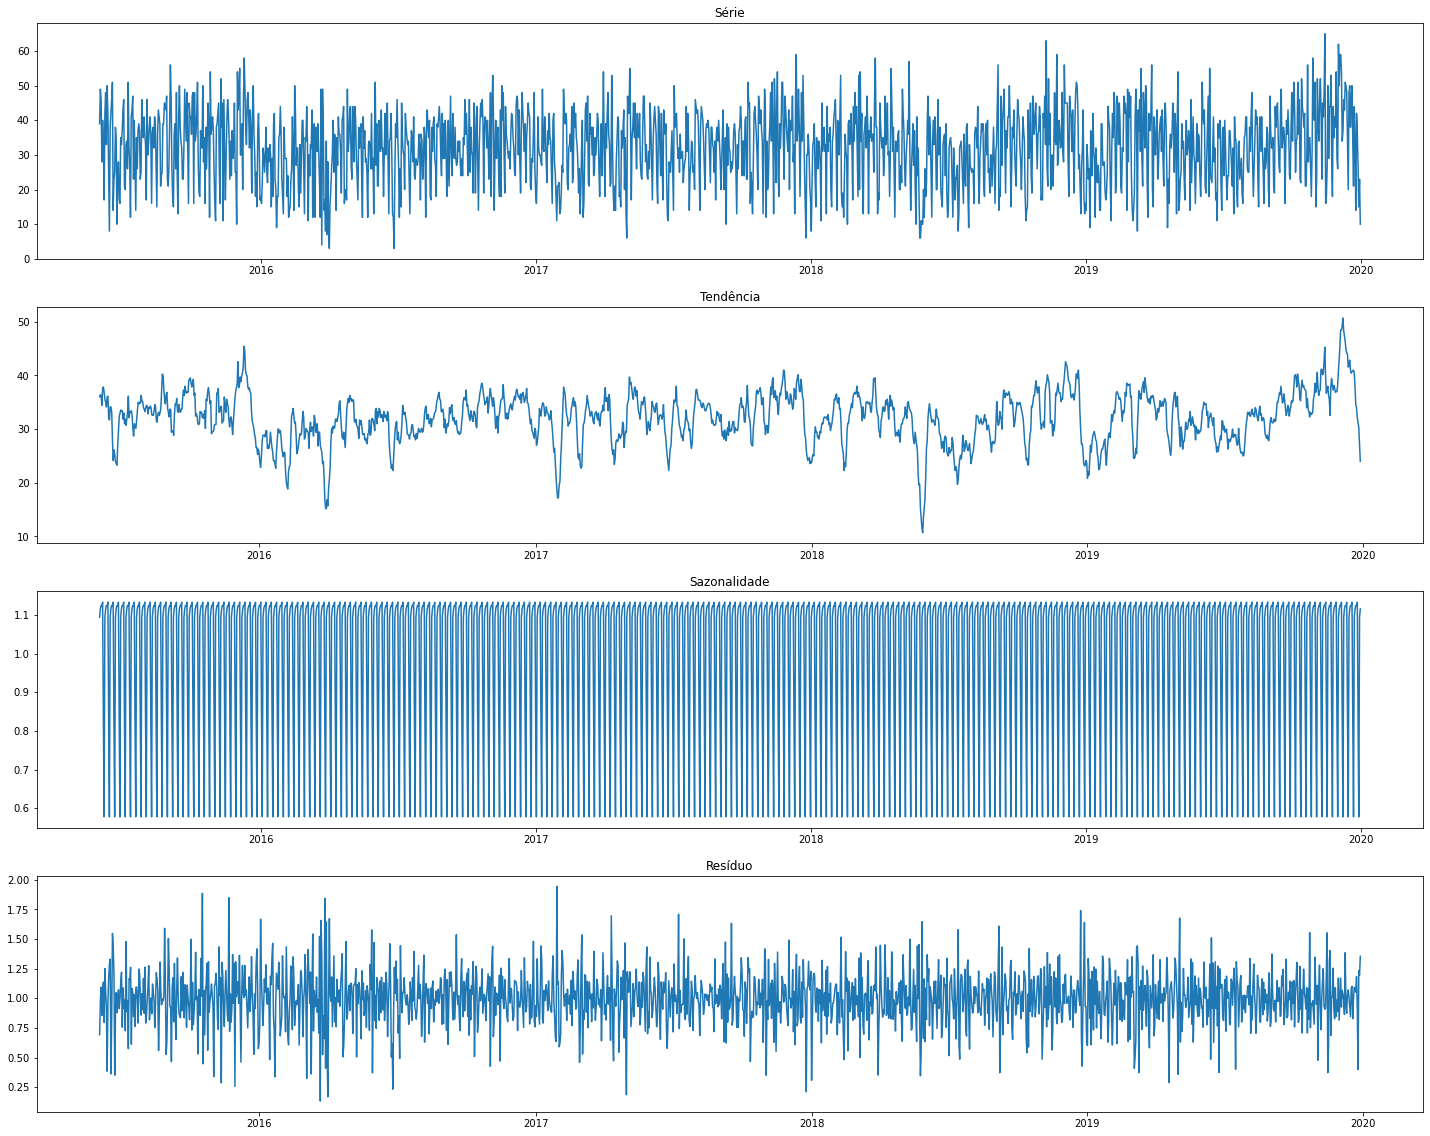

In [17]:
# Fazendo a decomposição da série e plotando

decomposition = seasonal_decompose(df_acidentes, model='multiplicative')

plot_decomposicao(decomposition)

In [18]:
# Testando a estacionariedade da série temporal com ADF

resultado_ADF = adfuller(df_acidentes['ocorrencias'], autolag='AIC')
print('Teste ADF. Valor p: {:0.3f}'.format(resultado_ADF[1]))

Teste ADF. Valor p: 0.000


In [19]:
# Testando a estacionariedade da série temporal com KPSS

_, valor_p, _, _ = kpss(df_acidentes['ocorrencias'], regression='ct')
print('Teste KPSS. Valor p: {:0.3f}'.format(valor_p))

Teste KPSS. Valor p: 0.095


/home/mauren/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


No teste ADF a hipótese nula é que a série não é estacionária. Como o p-value é menor do que 0.05, podemos rejeitar a hipótese nula. Portanto, a série é estacionária de acordo com o teste ADF.

No teste KPSS a hipótese nula é que a série é estacionária. Como o p-value é maior do que 0.05, não podemos rejeitar a hipótese nula. Portanto, a série é estacionária de acordo com o teste KPSS.

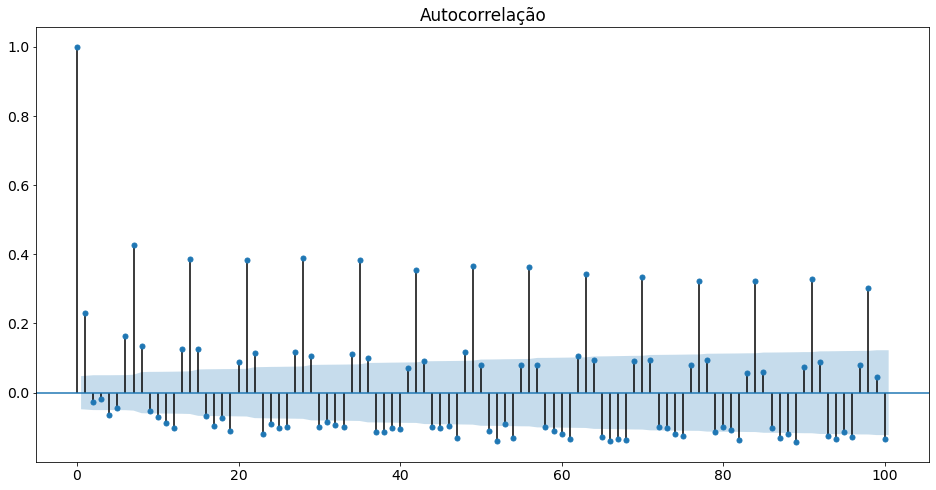

In [20]:
# Realizando a análise de autocorrelação nos dados, plotando 100 lags

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plot_acf(df_acidentes["ocorrencias"] , lags=100, ax=ax)  
plt.title('Autocorrelação')
plt.show() 

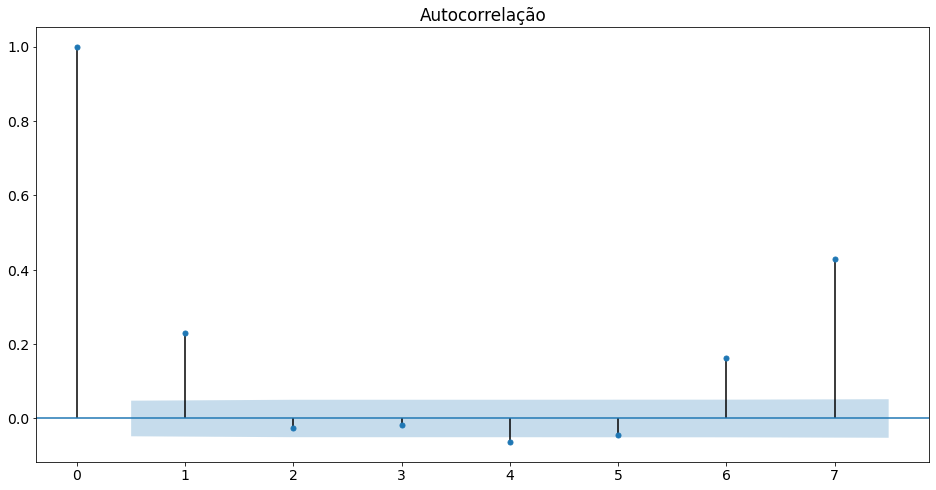

In [21]:
# Realizando a análise de autocorrelação nos dados, plotando 7 lags

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plot_acf(df_acidentes["ocorrencias"] , lags=7, ax=ax) 
plt.title('Autocorrelação')
plt.show() 

A autocorrelação representa o grau de similaridade entre uma determinada série temporal e uma versão defasada de si mesma em intervalos de tempo sucessivos.

Para cada linha temos o valor de um dia. É possível observar aqui que o maior valor está em 7. Isso ocorre porque possívelmente a série tem sazonalidade semanal. Obviamente, os valores múltiplos de 7 também serão altos, mas vão diminuindo com o passar do tempo.

In [22]:
# Salvando o dataset para uso posterior

df_acidentes.to_csv('data/df_acidentes.csv')